#Credit card fraud detection

In this project we want to use some popular algorithms to classification fraud
and non-fraud credit card transactions.

About the dataset:

dataset URL:

    https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

quick summary:

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Table of contents:

* [Downloading the dataset](#scrollTo=pSJH9JnOLJKW)
* [Importing necessary libraries](#scrollTo=Wd23S2oKLal7)
* [Loading and overviewing the dataset](#scrollTo=TkSdwHI1MFQb)
  * [Frauds](#scrollTo=v89GE9XpPwiR)
* [Preprocessing](#scrollTo=uPCTiK5PSU_2)
  * [Missing values](#scrollTo=PQ-RPbyBVIOu)
  * [Correlation matrix](#scrollTo=mmLfmbSeVK6y)
    * [Finding uncorrelated columns](#scrollTo=neUTw3HG5QB_)
    * [Removing Time and correlated features](#scrollTo=_m_J8kfS52Iy)
  * [Feature normalization](#scrollTo=dRcE4NFh_Ert)
* [Fit the models](#scrollTo=fiIa0JJVFKwQ)
  * [Spliting data](#scrollTo=aDmKDBYjPr1P)
    * [Checking the spliting](#scrollTo=7VIp20svRBXs)
    * [Spliting features and targets](#scrollTo=_jWdsC-wTdkf)
  * [Logistic Regression](#scrollTo=p5IQWGYPFdaa)
    * [Reporting the results](#scrollTo=Rpq8u3v9T6oB)
  * [KNN](#scrollTo=NDURSAl2hVuU)
    * [KNN with 3 neighbours](#scrollTo=PW_iEQ6Ui8sc)
      * [Reporting the results](#scrollTo=3mJHJHx5iln-)
    * [KNN with 5 neighbours](#scrollTo=7R7hRgfvjME1)
      * [Reporting the results](#scrollTo=LpwlNFZSjMFC)
    * [KNN with 7 neighbours](#scrollTo=gnjwZv8cjOZd)
      * [Reporting the results](#scrollTo=Jibn3jsMjOZ3)
    * [KNN with 15 neighbours](#scrollTo=jG0q_flkjksS)
      * [Reporting the results](#scrollTo=QdeLd29Djksf)
  * [Decision Tree](#scrollTo=W8xp-I32kmgV)
    * [Reporting the results](#scrollTo=jh2THgjEl7H-)
* [Comparing the results](#scrollTo=7TD0E0CfmGBy)
* [Saving the results](#scrollTo=sGcfPtzgnbVb)

## Downloading the dataset

Download and unzip the dataset.

In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 76% 50.0M/66.0M [00:00<00:00, 175MB/s]
100% 66.0M/66.0M [00:00<00:00, 175MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# activating seaborn's theme ----------
sns.set_theme()

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from joblib import dump

## Loading and overviewing the dataset

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
def class_counter(df, name):
  '''get dataframe and its name and show how many frauds and non-frauds are in it.'''

  non_frauds_count, frauds_count = df.Class.value_counts()

  print(f"""
    in the {name} dataset:
    all data: {frauds_count + non_frauds_count}
    frauds: {frauds_count}
    non-frauds: {non_frauds_count}
  """)

In [ ]:
class_counter(df, "orginal")


    in the orginal dataset:
    all data: 284807
    frauds: 492
    non-frauds: 284315
  


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


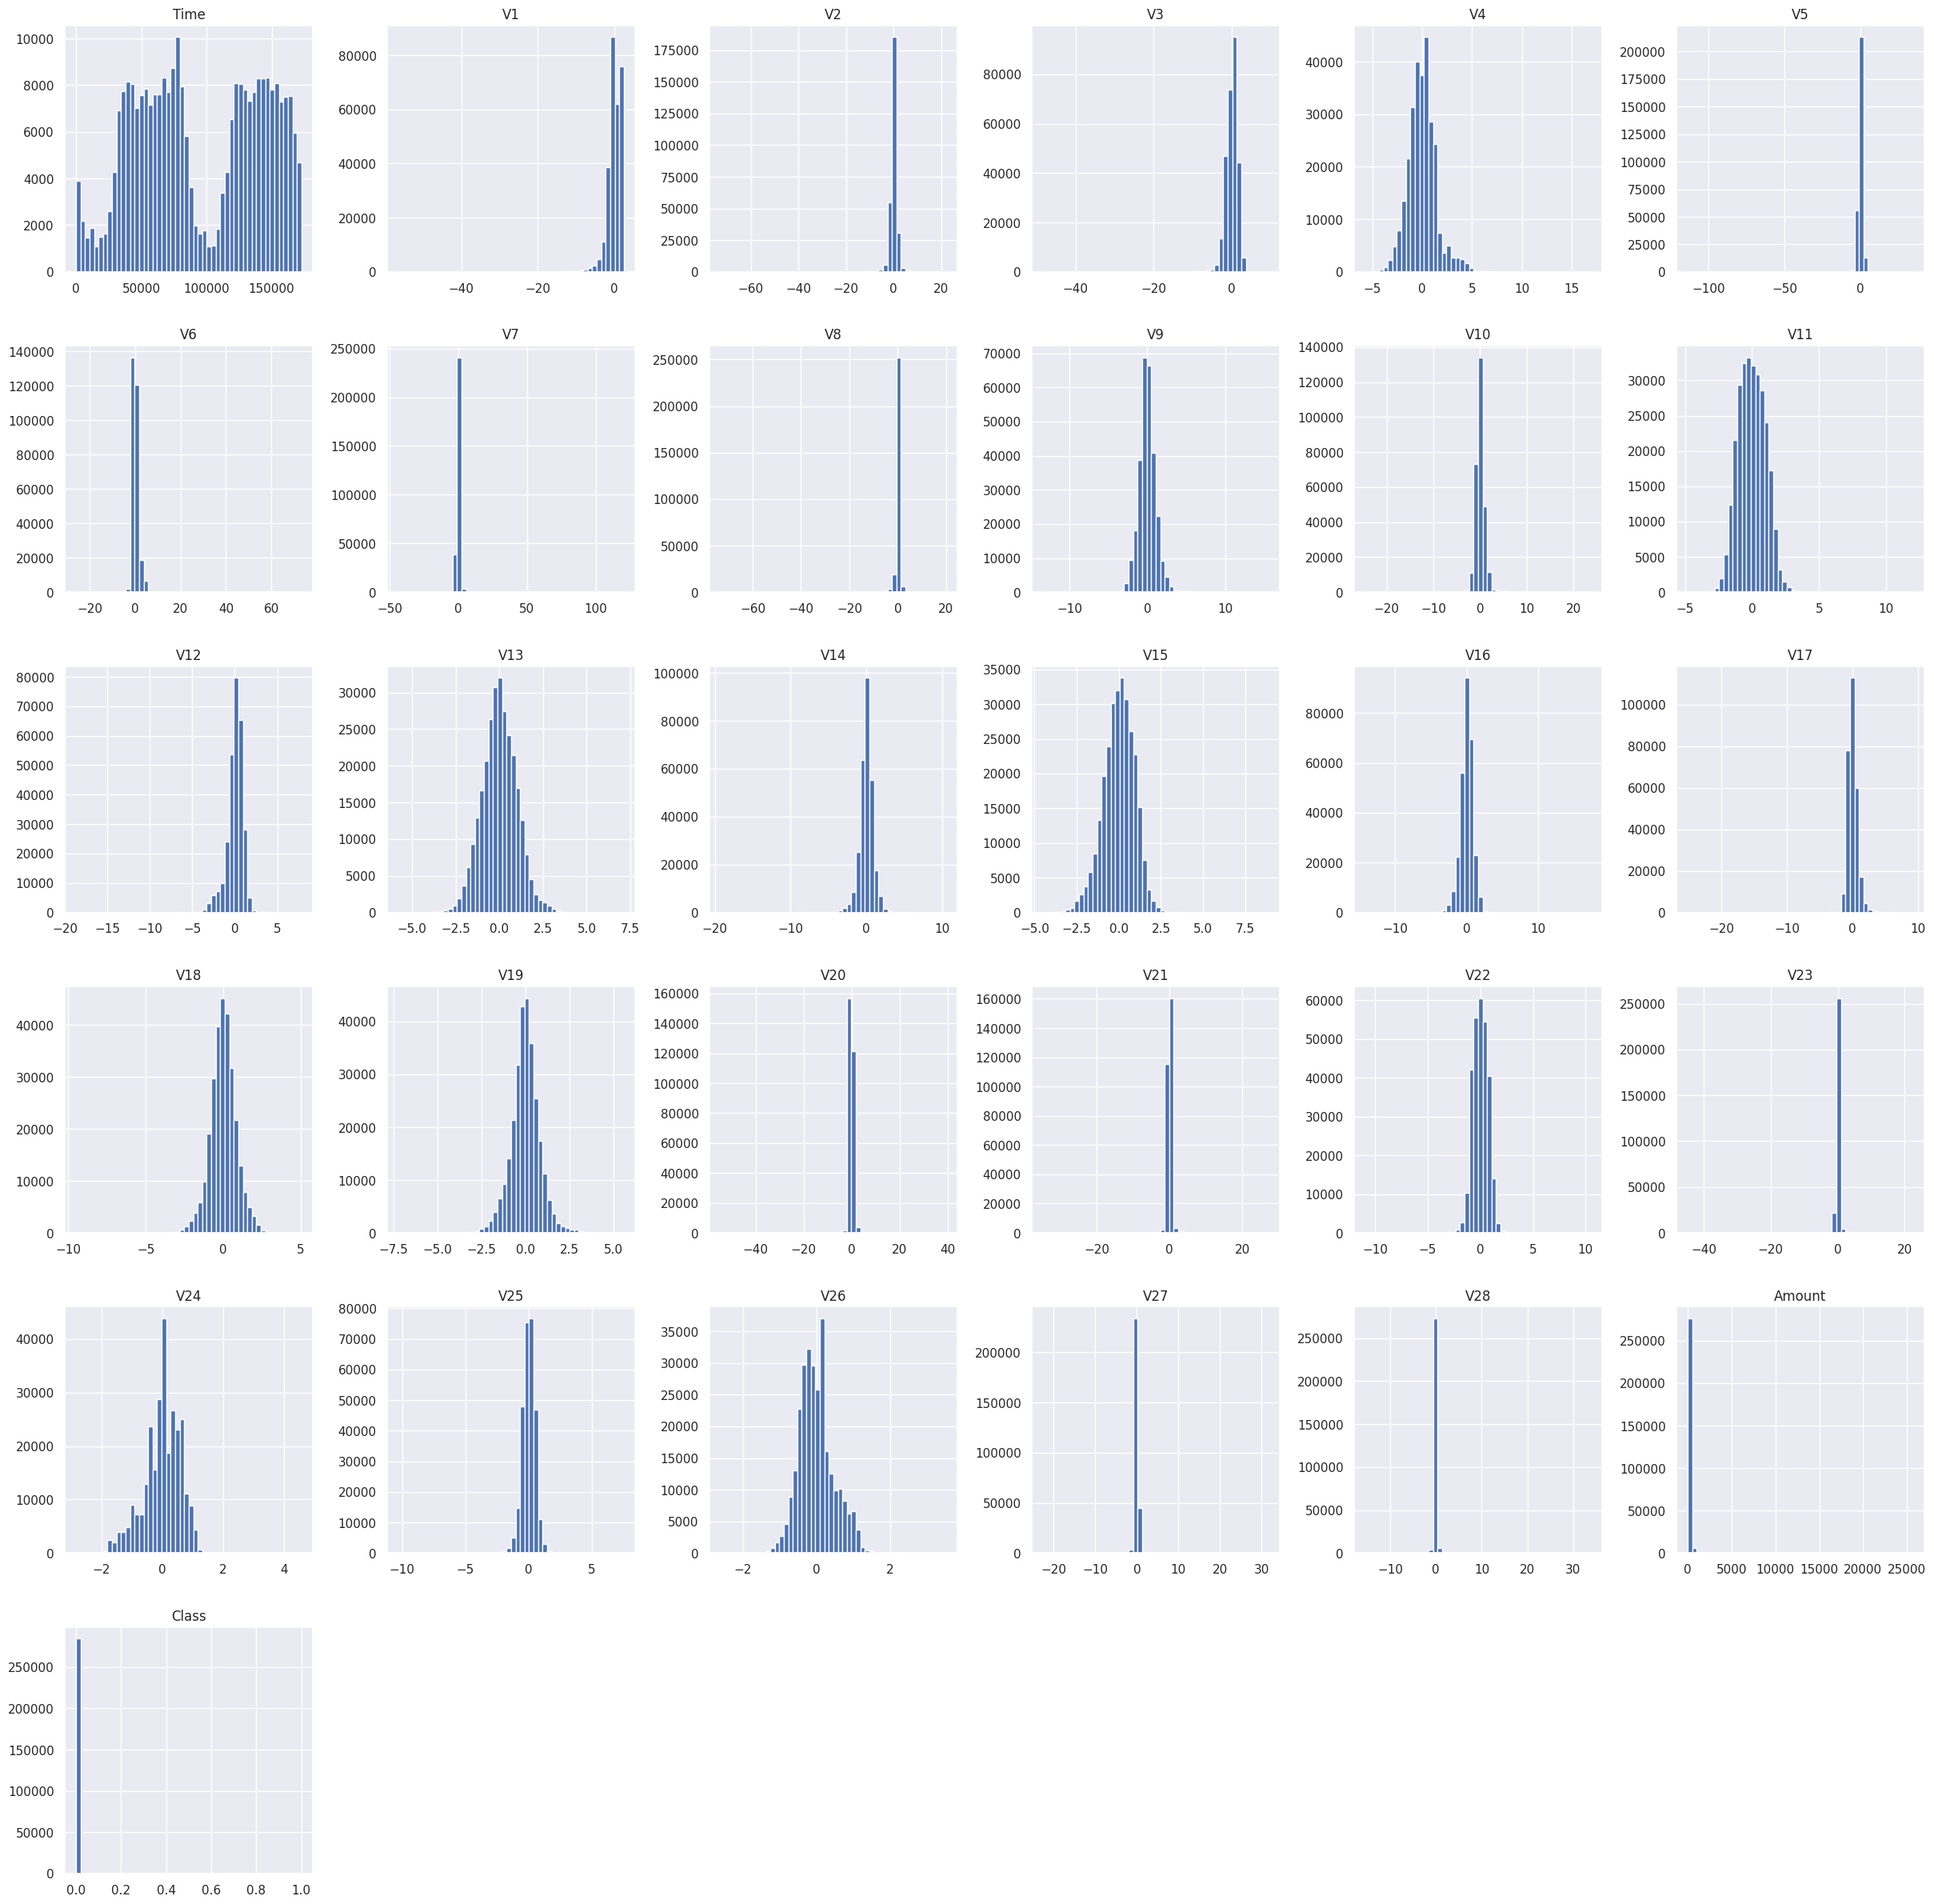

In [ ]:
df.hist(bins=50, figsize=(30, 30));

### Frauds

In [ ]:
frauds = df[df.Class == 1]

In [ ]:
frauds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
frauds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,...,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


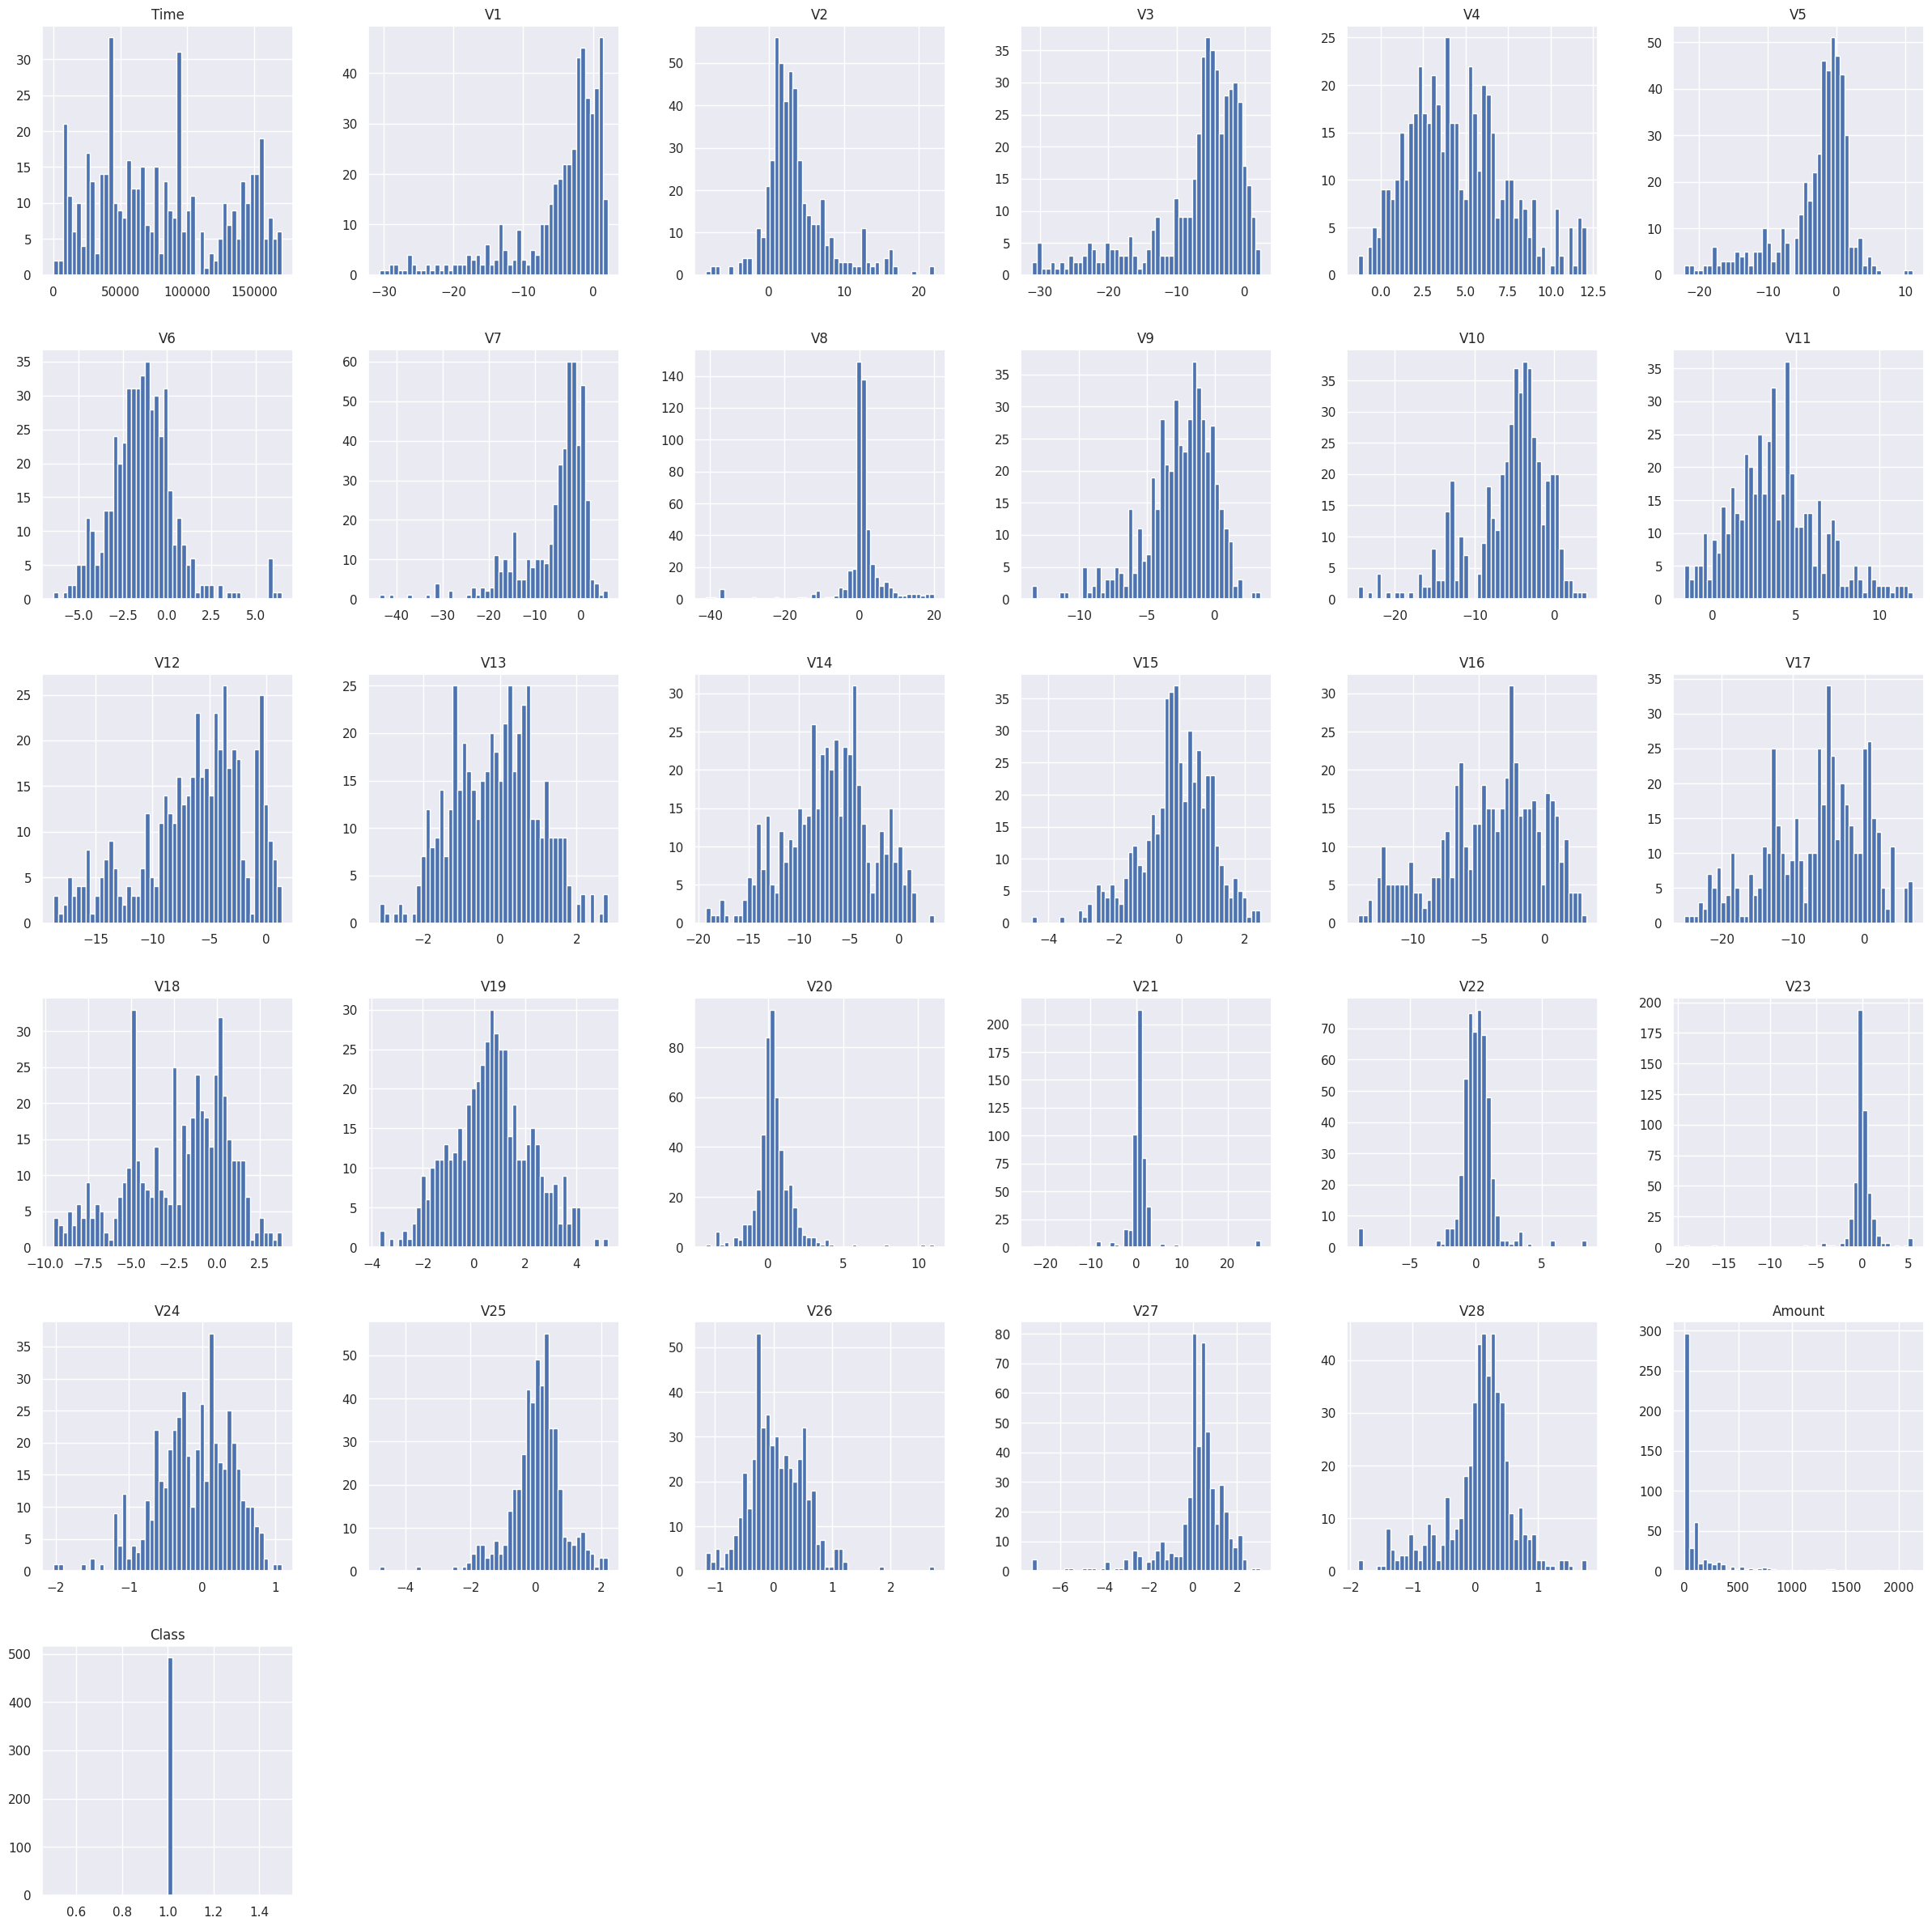

In [ ]:
frauds.hist(bins=50, figsize=(30, 30));

## Preprocessing
In this part we preprocess the dataset to fix some features if they contain some NAN or missing values and delete some irrelevant or highly correlated features.

For the second part calculate the correlation matrix and delete columns with high correlations.

At the last part we normalize the features.

### Missing values

In [ ]:
print(f"there is {df.size - df.notna().size} missing value.")

there is 0 missing value.


### Correlation matrix

In [ ]:
correlation_matrix = df.corr().abs()

In [ ]:
correlation_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,1.059333e-02,4.196182e-01,1.052602e-01,1.730721e-01,6.301647e-02,8.471437e-02,3.694943e-02,8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,1.618187e-02,2.330828e-01,4.140710e-02,5.134591e-03,9.412688e-03,0.010596,0.012323
V1,0.117396,1.000000e+00,4.135835e-16,1.227819e-15,9.215150e-16,1.812612e-17,6.506567e-16,1.005191e-15,2.433822e-16,1.513678e-16,...,2.457409e-16,4.290944e-16,6.168652e-16,4.425156e-17,9.605737e-16,1.581290e-17,1.198124e-16,2.083082e-15,0.227709,0.101347
V2,0.010593,4.135835e-16,1.000000e+00,3.243764e-16,1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,5.377041e-17,1.978488e-17,...,8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,4.478846e-16,2.057310e-16,4.966953e-16,5.093836e-16,0.531409,0.091289
V3,0.419618,1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,6.539009e-17,1.627627e-15,4.895305e-16,1.268779e-15,5.568367e-16,...,5.706192e-17,1.133902e-15,4.983035e-16,2.686834e-19,1.104734e-15,1.238062e-16,1.045747e-15,9.775546e-16,0.210880,0.192961
V4,0.105260,9.215150e-16,1.121065e-15,4.711293e-16,1.000000e+00,1.719944e-15,7.491959e-16,4.104503e-16,5.697192e-16,6.923247e-16,...,1.949553e-16,6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,4.247268e-16,3.977061e-17,2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,6.539009e-17,1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,3.920976e-16,1.253751e-16,8.428683e-18,1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,5.613951e-18,0.386356,0.094974
V6,0.063016,6.506567e-16,2.787346e-16,1.627627e-15,7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,1.104219e-16,4.131207e-16,...,5.833316e-17,4.705235e-19,1.046712e-16,1.071589e-15,4.562861e-16,1.357067e-16,4.452461e-16,2.594754e-16,0.215981,0.043643
V7,0.084714,1.005191e-15,2.055934e-16,4.895305e-16,4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,2.027779e-16,8.898922e-16,4.387401e-16,7.434913e-18,3.094082e-16,9.657637e-16,1.782106e-15,2.776530e-16,0.397311,0.187257
V8,0.036949,2.433822e-16,5.377041e-17,1.268779e-15,5.697192e-16,7.437229e-16,1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,1.047097e-16,4.653279e-16,1.727276e-16,1.299943e-16,6.200930e-16,0.103079,0.019875
V9,0.008660,1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,7.071869e-16,5.214137e-16,1.430343e-16,6.757763e-16,7.888853e-16,6.709655e-17,1.110541e-15,0.044246,0.097733


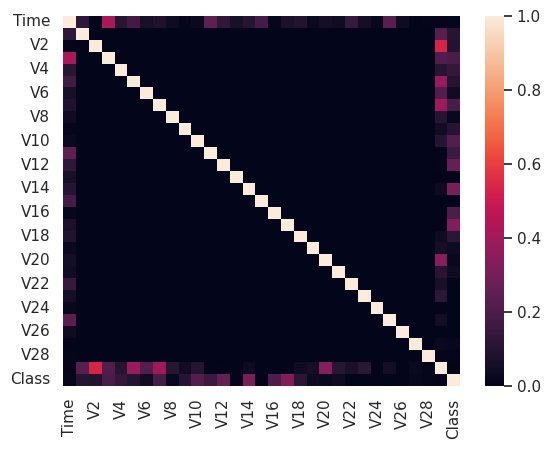

In [ ]:
sns.heatmap(correlation_matrix);

#### Finding uncorrelated columns
Defining a function that gives us all uncorrelated columns names.

In [ ]:
def uncorrelated_columns(corr_matrix, threshold, log=False):
  all_columns = list(corr_matrix.index)

  # make lower triangle and diagonal zero ----------
  upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).fillna(0)

  for column in all_columns:
    if log:
      print(f"column {column}:")
    correlated_columns = (upper_corr_matrix[column]).where(upper_corr_matrix[column] > threshold).dropna().index
    for c in correlated_columns:
      try:
        all_columns.remove(c)
        if log:
          print(f"{c} removed.")
      except:
        if log:
          print(f"{c} was removed earlier.")
        else:
          pass

  return all_columns

#### Removing Time and correlated features
We remove time because we don't want time effect our algorithms.

In [ ]:
# removing the Time feature and Class target-----------------------------------------------
# removing the columns -----------
new_corr_matrix = correlation_matrix.drop(["Time", "Class"], axis=1)
# removing the rows --------------
new_corr_matrix = new_corr_matrix.drop(["Time", "Class"], axis=0)

# finding uncorrelated features -----------------------------------------------------------
uncorrelated_features = uncorrelated_columns(new_corr_matrix, 0.9)

# adding Class target to them -------------------------------------------------------------
uncorrelated_features.append("Class")

# removeing the correlated features -------------------------------------------------------
new_df = df[uncorrelated_features]

In [ ]:
new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


There were no features correlated over 0.9 .

In [ ]:
# fit the scalar --------------------------------------
scalar = MinMaxScaler()
scalar.fit(new_df.drop("Class", axis=1).to_numpy());

### Feature normalization

In this part we use sklearn's MinMaxScalar to normalize the features with the formula below:

$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$

In [ ]:
# transforming the features ---------------------------
scaled_features_numpy = scalar.transform(new_df.drop("Class", axis=1).to_numpy())
scaled_features_df = pd.DataFrame(scaled_features_numpy, columns=new_df.columns[:-1])

In [ ]:
# make scaled dataframe with adding Class target ------
scaled_df = scaled_features_df
scaled_df["Class"] = new_df["Class"]

In [ ]:
scaled_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,0.598850,...,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030,0
284803,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,0.488530,...,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965,0
284804,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,0.498692,...,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642,0
284805,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,0.500464,...,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389,0


In [ ]:
scaled_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518113,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Fit the models
In this section we make and fit our models to do classification and reporting the results.

### Spliting data
Spliting The dataset into train, test and validation datasets.

In [ ]:
train_test, val = train_test_split(scaled_df, test_size=0.1, random_state=1)
train, test = train_test_split(train_test, test_size=0.1, random_state=1)

#### Checking the spliting
Checking if the spliting was good or not.

In [ ]:
class_counter(train, "train")
class_counter(test, "test")
class_counter(val, "validation")


    in the train dataset:
    all data: 230693
    frauds: 399
    non-frauds: 230294
  

    in the test dataset:
    all data: 25633
    frauds: 44
    non-frauds: 25589
  

    in the validation dataset:
    all data: 28481
    frauds: 49
    non-frauds: 28432
  


#### Spliting features and targets
Spliting the datasets to X (features) and Y (target) datasets.

In [ ]:
X_train, Y_train = train.drop("Class", axis=1).to_numpy(), train["Class"].to_numpy()
X_test, Y_test = test.drop("Class", axis=1).to_numpy(), test["Class"].to_numpy()
X_val, Y_val = val.drop("Class", axis=1).to_numpy(), val["Class"].to_numpy()

### Logistic Regression

As the firt model we use Logistic Regression model from sklearn library.

    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)

LogisticRegression()

#### Reporting the results
Reporting the results with test set.

In [ ]:
print(classification_report(Y_test, LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.89      0.57      0.69        44

    accuracy                           1.00     25633
   macro avg       0.95      0.78      0.85     25633
weighted avg       1.00      1.00      1.00     25633



### KNN
K nearest neighbours algorithms.

    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### KNN with 3 neighbours

In [ ]:
KNN_model_3 = KNeighborsClassifier(n_neighbors=3)
KNN_model_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

##### Reporting the results
Reporting the results with test set.

In [ ]:
print(classification_report(Y_test, KNN_model_3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.97      0.84      0.90        44

    accuracy                           1.00     25633
   macro avg       0.99      0.92      0.95     25633
weighted avg       1.00      1.00      1.00     25633



#### KNN with 5 neighbours

In [ ]:
KNN_model_5 = KNeighborsClassifier(n_neighbors=5)
KNN_model_5.fit(X_train, Y_train)

KNeighborsClassifier()

##### Reporting the results
Reporting the results with test set.

In [ ]:
print(classification_report(Y_test, KNN_model_5.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.95      0.84      0.89        44

    accuracy                           1.00     25633
   macro avg       0.97      0.92      0.95     25633
weighted avg       1.00      1.00      1.00     25633



#### KNN with 7 neighbours

In [ ]:
KNN_model_7 = KNeighborsClassifier(n_neighbors=7)
KNN_model_7.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

##### Reporting the results
Reporting the results with test set.

In [ ]:
print(classification_report(Y_test, KNN_model_7.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.92      0.82      0.87        44

    accuracy                           1.00     25633
   macro avg       0.96      0.91      0.93     25633
weighted avg       1.00      1.00      1.00     25633



#### KNN with 15 neighbours

In [ ]:
KNN_model_15 = KNeighborsClassifier(n_neighbors=15)
KNN_model_15.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

##### Reporting the results
Reporting the results with test set.

In [ ]:
print(classification_report(Y_test, KNN_model_15.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.92      0.77      0.84        44

    accuracy                           1.00     25633
   macro avg       0.96      0.89      0.92     25633
weighted avg       1.00      1.00      1.00     25633



In this 4 KNNs, KNN with 3 neighbours was the best on the test set.

### Decision Tree

Using decision tree algorithm to do the classification.

    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier()

##### Reporting the results
Reporting the results with test set.

In [ ]:
print(classification_report(Y_test, DT_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.86      0.70      0.78        44

    accuracy                           1.00     25633
   macro avg       0.93      0.85      0.89     25633
weighted avg       1.00      1.00      1.00     25633



## Comparing the results
Compareing the Logistic Regression, best KNN (with 3 neighbours) and Decision Tree algorithms results on the validation dataset.

In [ ]:
print("Logistic Regression:\n", classification_report(Y_test, LR_model.predict(X_test)))
print("KNN with 3 neighbours:\n", classification_report(Y_test, KNN_model_3.predict(X_test)))
print("Decision Tree:\n", classification_report(Y_test, DT_model.predict(X_test)))

Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.89      0.57      0.69        44

    accuracy                           1.00     25633
   macro avg       0.95      0.78      0.85     25633
weighted avg       1.00      1.00      1.00     25633

KNN with 3 neighbours:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.97      0.84      0.90        44

    accuracy                           1.00     25633
   macro avg       0.99      0.92      0.95     25633
weighted avg       1.00      1.00      1.00     25633

Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     25589
           1       0.86      0.70      0.78        44

    accuracy                           1.00     25633
   macro avg       0.93      0.85      0.89     25633
weighted avg

## Saving the results
Saving the best model and scalar used to normalize the features.

In [ ]:
dump(scalar, "MinMaxScalar")
dump(LR_model, "LR")
dump(KNN_model_3, "KNN3")
dump(DT_model, "DT");